# The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the data

In [2]:
data = pd.read_csv('../data/merged_information_clean.csv')

In [3]:
df = pd.DataFrame(data[
        ['Accident_Severity', 'Time', 'Light_Conditions', 'Weather_Conditions', 'Speed_limit', 'Road_Type',
         'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Age_Band_of_Driver', 'Sex_of_Driver', 'Age_of_Vehicle',
         'Vehicle_Manoeuvre', 'make', 'Vehicle_Type']])

## Get to Know The Data

In [4]:
df.shape

(2058283, 14)

In [5]:
list(df)

['Accident_Severity',
 'Time',
 'Light_Conditions',
 'Weather_Conditions',
 'Speed_limit',
 'Road_Type',
 'Road_Surface_Conditions',
 'Urban_or_Rural_Area',
 'Age_Band_of_Driver',
 'Sex_of_Driver',
 'Age_of_Vehicle',
 'Vehicle_Manoeuvre',
 'make',
 'Vehicle_Type']

In [6]:
df.sample(10)

,Accident_Severity,Time,Light_Conditions,Weather_Conditions,Speed_limit,Road_Type,Road_Surface_Conditions,Urban_or_Rural_Area,Age_Band_of_Driver,Sex_of_Driver,Age_of_Vehicle,Vehicle_Manoeuvre,make,Vehicle_Type
153600,Slight,16:25,Darkness - lights lit,Raining no high winds,40.0,Dual carriageway,Wet or damp,Rural,16 - 20,Male,5.0,Changing lane to left,VAUXHALL,Car
634307,Serious,09:29,Daylight,Fine no high winds,50.0,Single carriageway,Dry,Rural,46 - 55,Male,11.0,Parked,JEEP,Car
323775,Slight,19:00,Daylight,Fine no high winds,30.0,Single carriageway,Dry,Rural,36 - 45,Male,3.0,Going ahead other,RENAULT,Car
888628,Slight,15:50,Daylight,Raining no high winds,30.0,Single carriageway,Wet or damp,Urban,26 - 35,Male,3.0,Waiting to turn right,VAUXHALL,Car
1977894,Serious,17:30,Daylight,Fine no high winds,20.0,Single carriageway,Dry,Urban,56 - 65,Male,10.0,Moving off,AUDI,Car
1085198,Slight,00:40,Darkness - lights lit,Raining no high winds,30.0,Single carriageway,Wet or damp,Urban,36 - 45,Male,NaN,Going ahead other,VAUXHALL,Car
52586,Slight,11:00,Daylight,Fine no high winds,40.0,Single carriageway,Dry,Urban,16 - 20,Female,13.0,Going ahead other,FORD,Car
1529151,Slight,08:55,Daylight,Fine no high winds,40.0,Slip road,Dry,Urban,26 - 35,Female,2.0,Waiting to go - held up,VAUXHALL,Car
1528813,Slight,11:00,Daylight,Fine no high winds,30.0,Roundabout,Dry,Urban,Over 75,Male,8.0,Going ahead other,NISSAN,Car
616859,Slight,18:00,Daylight,Raining no high winds,70.0,Dual carriageway,Wet or damp,Rural,16 - 20,Female,6.0,Going ahead other,HONDA,Car


In [7]:
df.describe()

,Speed_limit,Age_of_Vehicle
count,2.058218e+06,1.720364e+06
mean,3.975674e+01,7.143274e+00
std,1.460907e+01,4.728711e+00
min,0.000000e+00,1.000000e+00
25%,3.000000e+01,3.000000e+00
50%,3.000000e+01,7.000000e+00
75%,5.000000e+01,1.000000e+01
max,7.000000e+01,1.110000e+02


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058283 entries, 0 to 2058282
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Accident_Severity        object 
 1   Time                     object 
 2   Light_Conditions         object 
 3   Weather_Conditions       object 
 4   Speed_limit              float64
 5   Road_Type                object 
 6   Road_Surface_Conditions  object 
 7   Urban_or_Rural_Area      object 
 8   Age_Band_of_Driver       object 
 9   Sex_of_Driver            object 
 10  Age_of_Vehicle           float64
 11  Vehicle_Manoeuvre        object 
 12  make                     object 
 13  Vehicle_Type             object 
dtypes: float64(2), object(12)
memory usage: 219.8+ MB


In [9]:
df.isnull().sum()

Accident_Severity               0
Time                            0
Light_Conditions                0
Weather_Conditions              0
Speed_limit                    65
Road_Type                       0
Road_Surface_Conditions         0
Urban_or_Rural_Area             0
Age_Band_of_Driver              0
Sex_of_Driver                   0
Age_of_Vehicle             337919
Vehicle_Manoeuvre               0
make                            0
Vehicle_Type                    0
dtype: int64

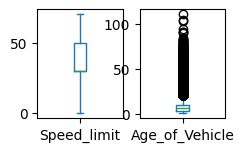

In [10]:
# Draw box-whisker plots
df.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

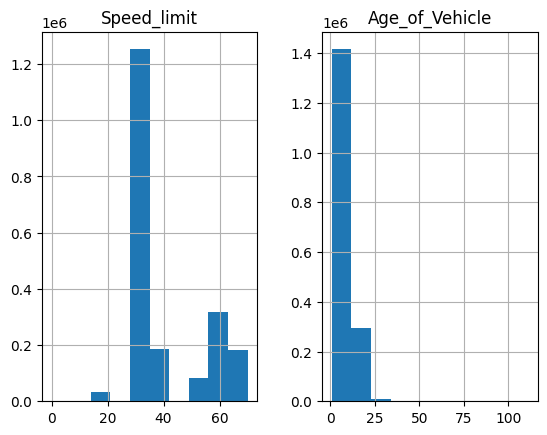

In [11]:
# Draw histograms for each feature
df.hist()
plt.show()

## Now we are ready to do some data wrangling:
Check out:
'prediction\supervised\wrangle_data.py'

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPRegressor
from joblib import dump, load
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def wrangle_data(data):
    print("Loading and wrangling data...")

    # index_col = data.iloc[:, 0]

    data_cut = pd.DataFrame(data[
        ['Accident_Severity', 'Time', 'Light_Conditions', 'Weather_Conditions', 'Speed_limit', 'Road_Type',
         'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Age_Band_of_Driver', 'Sex_of_Driver', 'Age_of_Vehicle',
         'Vehicle_Manoeuvre', 'make', 'Vehicle_Type']])

    # data_cut.loc[:, 'ID'] = index_col

    data_cut.replace('No data', np.nan, inplace=True)
    data_cut.replace('Not known', np.nan, inplace=True)
    data_cut.replace('', np.nan, inplace=True)

    # Drop rows with NaN in all but 2 columns. These are the columns where we want to fill the missing values.
    cols_to_drop_na = [col for col in data_cut.columns if col not in ['Age_of_Vehicle', 'Age_Band_of_Driver']]
    data_cut.dropna(subset=cols_to_drop_na, inplace=True)

    # Convert Time to minutes since midnight
    data_cut['Time'] = pd.to_timedelta(data_cut['Time'] + ':00')
    data_cut['Time'] = data_cut['Time'].dt.total_seconds() / 60

    # Fill NaN values in 'Age_of_Vehicle' with the median value
    data_cut.loc[:, 'Age_of_Vehicle'] = data_cut['Age_of_Vehicle'].fillna(data_cut['Age_of_Vehicle'].median())

    # Fill NaN values in 'Age_Band_of_Driver' with the mode value
    data_cut.loc[:, 'Age_Band_of_Driver'] = data_cut['Age_Band_of_Driver'].fillna(data_cut.mode().iloc[0]['Age_Band_of_Driver'])

    data_cut.to_csv('data/clean_filled.csv', index=False, encoding='utf-8')